# **Transfer Learning**

Öğrenilen bilginin transferi anlamına gelir.

Milyonlarca görselden oluşan bir data train edildiğinde, binlerce classtan oluşan bir model elde edilir.

Bu model başka classları sınıflandırmak için de kullanılabilir. Bu yöntemin adı da transfer learning'dir.

Transfer learning modelinde

low level feature'lar kesilir. Bu kısım **pretrained** kısmıdır. Buradaki weightler daha önceden öğrenilmiş kısımdır.

Yeni classlarla öğrenilen kısım **fine tuning** kısmıdır.

Kedi ve köpek görsellerinden oluşan bir datanın train edildiğinde;

low level'da basic shape'ler,

mid level'da non linearity'si yüksek shape'ler,

high level'da daha karmaşık şekiller ortaya çıkar.

En sonda sigmoid function'a koyulup kedi-köpek görselleri output olarak ortaya çıkar.

Bu dataya kuşlardan oluşan bir class eklendiğinde;

pretrained kısmı kesilerek dondurulur, en sona softmax function eklenir. Böylelikle yeni bir weight ve output ortaya çıkmış olur.

Yeni dataya pretrained kısım adapte edilmiş olur.

Önceden eğitilmiş datadaki weightleri kullanmak yerine baştan sona da train edilebilir.

Bir önceki datada eğitilmiş weightler küçük değişikliklerle yeni dataya adapte olur.

Küçük networkler için baştan sona train etmek kolaydır.

Ancak layer sayısı arttıkça baştan sona eğitmek zaman kaybı olacaktır.

Bu yüzden önceden eğitilmiş network transfer learning ile kullanılacak dataya implemente edilir.

VGG ve ResNet yapıları transfer learning için uygundur.

VGG convolutional yapıların art arda dizilmesiyle ortaya çıkan sequential bir yapıdır.

ResNet'te ise residual connection(shortcut) bulunur. Bu yapı sayesinde vanishing gradient problem'e çözüm ürettiğinden transfer learning'de en başarılı model olarak gösterilmektedir. 

Keras ImageNet datası tarafından eğittiği VGG ve ResNet yapılarını sağlamaktadır.

ImageNet datası yaklaşık 14 milyon görselden ve 1000 tane classtan oluşur.

Bu datada feature extraction'lar çıkartılmış, weightler belirlenmiş, en optimum hyperparameterlar tuned edilmiştir.

Fruit360 datasında VGG-16 modeli kullanılacaktır.

In [ ]:
#libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob #kaç classın olduğunu öğrenmek için glob kütüphanesi kullanılır.
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
import tensorflow as tf
tf.device("/device:GPU:1")
device_name = tf.test.gpu_device_name()
if device_name != ("/device:GPU:0"):
    raise SystemError("GPU device not found")
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
train_path = r"C:\Users\ŞEVVAL\Desktop\fruits-360\Training"
test_path = r"C:\Users\ŞEVVAL\Desktop\fruits-360\Test"

In [ ]:
img = load_img(train_path+"/Avocado/0_100.jpg")

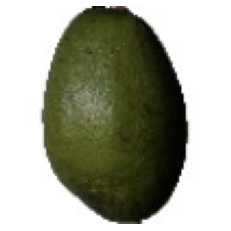

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
x = img_to_array(img) #görsel arraye çevrilir.
x.shape #size'a bakılır.

(100, 100, 3)

100 -> y ekseni

100 -> x ekseni

3 -> renkli bir görsel (rgb)

In [ ]:
numberOfclass = len(glob(train_path + "/*"))

In [ ]:
from keras.applications.vgg16 import VGG16
vgg = VGG16() #16 layerdan oluşan VGG modeli

553467096/553467096 [==============================] - 107s 0us/step


VGG 16 modeli ile ilgili parametler indirilmiştir.

In [ ]:
print(vgg.summary())
print(type(vgg))

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

vgg.summary methoduyla vgg içerisindeki layerlara bakılmıştır.

Bu layerlar convolution, pooling, flatten, dense layerdır.

Son Dense layer ise prediction yapılan output layer'dır.

138,357,544 train edilebilir parametre bulunmaktadır.

In [ ]:
vgg_layer_list = vgg.layers
print(vgg_layer_list)

[<keras.engine.input_layer.InputLayer object at 0x00000296887C0700>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000029694E0CF40>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000002968E784FA0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002968E8070D0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x0000029694E69520>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000002968C2017C0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002968E757C10>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000002968C867460>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000002968C21F310>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000002968C21F340>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x000002968C20DAC0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000002968C21AB20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x000002968C5B45B0>, <keras.layers.convolutional.conv2d

Tüm layerlar liste halinde yazdırılmıştır.

Burada 1000 classtan oluşan bir data kullanılarak eğitilen VGG modeli bulunmaktadır.

Fruit datası 131 classtan oluşmaktadır.

Son layer çıkartılıp, yeni bir output layer eklenecektir.

In [ ]:
model = Sequential()
for i in range(len(vgg_layer_list)-1):
    model.add(vgg_layer_list[i])

Sequential methodu modelin üzerine sıralı bir şekilde layer eklemek için kullanılır.

Output layer'ı hariç vgg 16 modeli model variable'ına eşitlenir.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

Prediction yapılan output layerın ortadan kaldırıldığı görülür.

In [ ]:
for layers in model.layers:
    layers.trainable = False

Vgg modelinde layerlar önceden train edildiği için,  her bir layer tek tek dolaşılarak train özelliği kapatılır.

Böylelikle ImageNet datası kullanılarak train edilmiş weight parametreleri kullanılacaktır.

In [ ]:
model.add(Dense(numberOfclass, activation="softmax"))

Output layer'da kullanılacak data numberOfclass değişkenine atanmış train datasıdır.

131 class olduğu için 131 node'dan oluşacaktır.

Multi class classification olduğu için activation function olarak softmax kullanılacaktır.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

131 node'dan oluşan son layerın modele eklendiği görülür.

Böylelikle VGG-16 modeline Fruit datası transfer edilmiştir.

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"])

loss -> categorical cross entropy hesaplanarak bulunur.

learning rate'i optimize etmek için rmsprop kullanılacaktır.

metrics -> accuracy'e bakılacaktır.

In [ ]:
# train  
train_data = ImageDataGenerator().flow_from_directory(train_path,target_size = (224,224))
test_data = ImageDataGenerator().flow_from_directory(test_path,target_size = (224,224))

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


Train datasındaki görsellerin shape'i 100x100'dür.

VGG-16 modelinde kullanılan ImageNet datasındaki görsellerin shape'i 224x224'tür. Bu yüzden target size 100x100'den 224x224'e çevrilmiştir. Bunun için ImageDataGenerator methodu kullanılmıştır.

Aynı yöntem test datası için de kullanılmıştır.

In [ ]:
batch_size = 32

In [ ]:
hist = model.fit_generator(train_data,
                           steps_per_epoch=1600//batch_size,
                           epochs= 25,
                           validation_data=test_data,
                           validation_steps= 800//batch_size)

Epoch 1/25
50/50 [==============================] - 26s 276ms/step - loss: 3.7783 - accuracy: 0.4212 - val_loss: 1.8042 - val_accuracy: 0.5612
Epoch 2/25
50/50 [==============================] - 13s 265ms/step - loss: 0.8495 - accuracy: 0.7600 - val_loss: 1.2045 - val_accuracy: 0.7100
Epoch 3/25
50/50 [==============================] - 80s 2s/step - loss: 0.4678 - accuracy: 0.8644 - val_loss: 0.7632 - val_accuracy: 0.8075
Epoch 4/25
50/50 [==============================] - 13s 265ms/step - loss: 0.3354 - accuracy: 0.9094 - val_loss: 0.8988 - val_accuracy: 0.7975
Epoch 5/25
50/50 [==============================] - 13s 266ms/step - loss: 0.2486 - accuracy: 0.9306 - val_loss: 0.5893 - val_accuracy: 0.8525
Epoch 6/25
50/50 [==============================] - 14s 272ms/step - loss: 0.1849 - accuracy: 0.9469 - val_loss: 0.5904 - val_accuracy: 0.8763
Epoch 7/25
50/50 [==============================] - 14s 272ms/step - loss: 0.1377 - accuracy: 0.9550 - val_loss: 0.6180 - val_accuracy: 0.8950
Ep

In [ ]:
model.save_weights("transfer_learning_fruit_hist.h5")

Fruit datasıyla eğitilmiş modelin weight değerleri kaydedilir.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


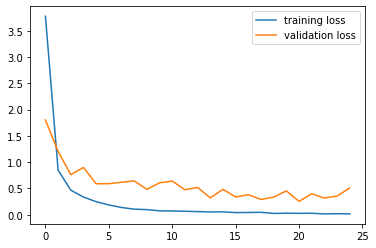

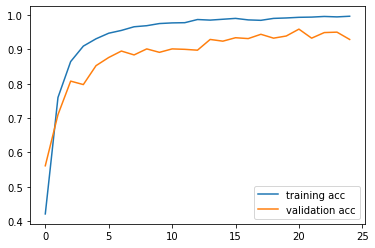

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label = "training loss")
plt.plot(hist.history["val_loss"],label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"],label = "training acc")
plt.plot(hist.history["val_accuracy"],label = "validation acc")
plt.legend()
plt.show()

History'de tutulan loss, accuracy, val_loss, val_accuracy değerleri görselleştirilmiştir. 

Loss değeri ilk başta fazladır. Epoch sayısı arttıkça giderek azalmıştır.

Accuracy değeri ilk başta azdır. Epoch sayısı arttıkça arttığı görülür.

In [ ]:
#save history
import json, codecs
with open("transfer_learning_fruit_hist.json","w") as f:
    json.dump(hist.history,f)

Modelin sonuçları program tekrar açıldığında tekrardan çalıştırılmamak için kaydedilir.

In [ ]:
#load history
with codecs.open("transfer_learning_fruit_hist.json","r",encoding = "utf-8") as f:
    n = json.loads(f.read())

Kaydedilmiş modeldeki parametreler yüklenmiştir.

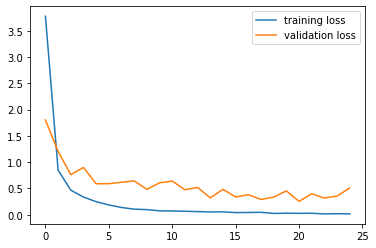

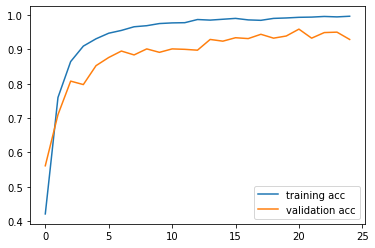

In [ ]:
plt.plot(n["loss"],label = "training loss")
plt.plot(n["val_loss"],label = "validation loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(n["accuracy"],label = "training acc")
plt.plot(n["val_accuracy"],label = "validation acc")
plt.legend()
plt.show()

Yüklenen parametreler görselleştirilmiştir.

Eğer bu görselleştirme önceden yapılmasaydı parametreler kaydedildiği için bu şekilde görselleştirildi.